In [1]:
import numpy as np
import pandas as pd
import time
import psutil
import matplotlib.pyplot as plt 
import numpy as np

# We create a very simple data set with 5 data items in it. 
size= 5

# mu, sigma = 100, 5000 # mean and standard deviation
# error=np.random.normal(mu, sigma, size)

In [2]:
x1 = np.arange(0, size)
# x2 = np.arange(1, size)
x2 = np.arange(5, 5+size)
# y = 2.5*x1 + error
y1=2.5 * x1
y2 =-1 *x2
# y = 2*x1 + 10* x2
x = []
for i in range(size):
    x.append(np.array([x1[i],x2[i]]))

y = y1+y2
# plt.plot(x1, y, 'o', markersize=2)
# plt.show()

print(x)
# print(x2)
# print(error)
print(y)




[array([0, 5]), array([1, 6]), array([2, 7]), array([3, 8]), array([4, 9])]
[-5.  -3.5 -2.  -0.5  1. ]


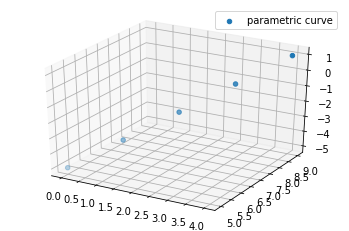

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
 
mpl.rcParams['legend.fontsize'] = 10
 
fig = plt.figure()
ax = fig.gca(projection='3d')

x1 = np.arange(0, size)
# x2 = np.arange(1, size)
x2 = np.arange(5, 5+size)
ax.scatter3D(x1, x2, y, label='parametric curve')
ax.legend()
 
plt.show()

In [4]:
learningRate = 0.01
num_iteration = 300 
m_current=np.zeros(2)

n = float(size)
# print("Sample size", n)

# Let's start with main iterative part of gradient descent algorithm 
for i in range(num_iteration):
    
    # Calculate the prediction with current regression coefficients. 
    cost = 0
    m_gradient = 0
    
    for j in range(size):
        
        y_prediction = np.dot(m_current,x[j])
    
    
    # We compute costs just for monitoring 
        cost += ( y[j] - y_prediction)**2

    # calculate gradients.
        m_gradient += x[j] * (y[j] - y_prediction)
    
    m_gradient = (-1.0/n)* m_gradient
    
    print(i , "m=", m_current, " Cost=", cost)
        
    # update the weights - Regression Coefficients 
    m_current = m_current - learningRate * m_gradient

0 m= [0. 0.]  Cost= 42.5
1 m= [-0.01 -0.11]  Cost= 33.5645
2 m= [-0.0018 -0.1623]  Cost= 31.392868550000003
3 m= [ 0.014276 -0.189239]  Cost= 30.532238746894997
4 m= [ 0.03369768 -0.20501127]  Cost= 29.932011752353187
5 m= [ 0.05447762 -0.21584715]  Cost= 29.38965773095855
6 m= [ 0.07574451 -0.22448152]  Cost= 28.86602394426417
7 m= [ 0.09711688 -0.23211507]  Cost= 28.353433547975342
8 m= [ 0.11842828 -0.23927508]  Cost= 27.850275694662844
9 m= [ 0.1396066  -0.24619332]  Cost= 27.35611045054374
10 m= [ 0.16062113 -0.25297178]  Cost= 26.87072575002126
11 m= [ 0.18145935 -0.25965555]  Cost= 26.39395568369584
12 m= [ 0.20211668 -0.26626472]  Cost= 25.925645452726474
13 m= [ 0.22259203 -0.27280838]  Cost= 25.465644578160983
14 m= [ 0.24288585 -0.27929083]  Cost= 25.013805554089178
15 m= [ 0.26299923 -0.28571424]  Cost= 24.56998355019686
16 m= [ 0.28293356 -0.29207986]  Cost= 24.134036317153765
17 m= [ 0.30269032 -0.2983885 ]  Cost= 23.70582413173796
18 m= [ 0.32227106 -0.30464082]  Cost= 2

In [5]:
# Now we do gradient Decent on our RDD data set. 
from pyspark.ml.linalg import Vectors
from pandas import Series,DataFrame
import pandas as pd


learningRate = 0.01
num_iteration = 100

beta = np.zeros(2)
# print(beta)
x1 = [0,1,2,3,4]
# x2 = np.arange(1, size)
x2 = [5,6,7,8,9]
# y = 2.5*x1 + error
y1 = [i * 2.5 for i in x1]
y2 = [i * -1 for i in x2]

x = []
y = []
for i in range(size):
    x.append([x1[i], x2[i]])
    y.append(y1[i]+y2[i])
    


# plt.plot(x1, y, 'o', markersize=2)
# plt.show()

print(x)
# print(x2)
# print(error)
print(y)

data = {'y':y,
       'x':x}
df = DataFrame(data)

spark_df_from_pandas = spark.createDataFrame(df, schema=['x', 'y'])
# df = np.stack([y, x], axis=1)
# print(df)
# dff = map(lambda x: (float(x[0]), Vectors.dense(x[1:])), df)
# mydf = spark.createDataFrame(dff, schema=["label", "features"])



# # Now, we create an RDD from this data. 
# # X is a numpy array 
# # y is a simple value lable
myRDD=spark_df_from_pandas.rdd.map(lambda x: (float(x[0]), np.array(x[1]) ))

# n=5000, m=100
# partition(50), mapParitionWithIndex(), filter
# mapPartition() 

# # Let's start with main iterative part of gradient descent algorithm 
for i in range(num_iteration):
    # sample = myRDD.sample(False, 100)
    
    gradientCost=sample.map(lambda x: (x[1], (x[0] - np.dot(x[1] , beta) )))\
                           .map(lambda x: (x[0]*x[1], x[1]**2 )).reduce(lambda x, y: (x[0] +y[0], x[1]+y[1] ))
    
    cost= gradientCost[1]
    
    gradient=(-1/float(size))* gradientCost[0]
    
    print(i, "Beta", beta, " Cost", cost)
    beta = beta - learningRate * gradient


[[0, 5], [1, 6], [2, 7], [3, 8], [4, 9]]
[-5.0, -3.5, -2.0, -0.5, 1.0]
0 Beta [0. 0.]  Cost 42.5
1 Beta [-0.01 -0.11]  Cost 33.5645
2 Beta [-0.0018 -0.1623]  Cost 31.392868550000003
3 Beta [ 0.014276 -0.189239]  Cost 30.532238746894997
4 Beta [ 0.03369768 -0.20501127]  Cost 29.932011752353187
5 Beta [ 0.05447762 -0.21584715]  Cost 29.38965773095855
6 Beta [ 0.07574451 -0.22448152]  Cost 28.86602394426417
7 Beta [ 0.09711688 -0.23211507]  Cost 28.353433547975342
8 Beta [ 0.11842828 -0.23927508]  Cost 27.850275694662844
9 Beta [ 0.1396066  -0.24619332]  Cost 27.35611045054374
10 Beta [ 0.16062113 -0.25297178]  Cost 26.87072575002126
11 Beta [ 0.18145935 -0.25965555]  Cost 26.39395568369584
12 Beta [ 0.20211668 -0.26626472]  Cost 25.925645452726474
13 Beta [ 0.22259203 -0.27280838]  Cost 25.465644578160983
14 Beta [ 0.24288585 -0.27929083]  Cost 25.013805554089178
15 Beta [ 0.26299923 -0.28571424]  Cost 24.56998355019686
16 Beta [ 0.28293356 -0.29207986]  Cost 24.134036317153765
17 Beta [

In [6]:
x1 = np.arange(0, size)
# x2 = np.arange(1, size)
x2 = np.arange(5, 5+size)
x3 = np.arange(2, 2+size)

# y = 2.5*x1 + error
y1=2.5 * x1
y2 =-1 *x2
y3 = 1*x3
# y = 2*x1 + 10* x2
x = []
for i in range(size):
    x.append(np.array([x1[i],x2[i],x3[i]]))

y = y1+y2+y3
# plt.plot(x1, y, 'o', markersize=2)
# plt.show()

print(x)
# print(x2)
# print(error)
print(y)


learningRate = 0.01
num_iteration = 100 
m_current=np.zeros(3)

n = float(size)
# print("Sample size", n)

# Let's start with main iterative part of gradient descent algorithm 
for i in range(num_iteration):
    
    # Calculate the prediction with current regression coefficients. 
    cost = 0
    m_gradient = 0
    
    for j in range(size):
        
        y_prediction = np.dot(m_current,x[j])
    
    
    # We compute costs just for monitoring 
        cost += ( y[j] - y_prediction)**2

    # calculate gradients.
        m_gradient += x[j] * (y[j] - y_prediction)
    
    m_gradient = (-1.0/n)* m_gradient
    
    print(i , "m=", m_current, " Cost=", cost)
        
    # update the weights - Regression Coefficients 
    m_current = m_current - learningRate * m_gradient

[array([0, 5, 2]), array([1, 6, 3]), array([2, 7, 4]), array([3, 8, 5]), array([4, 9, 6])]
[-3.  -0.5  2.   4.5  7. ]
0 m= [0. 0. 0.]  Cost= 82.5
1 m= [0.09 0.19 0.13]  Cost= 43.685500000000005
2 m= [0.1312 0.2297 0.1706]  Cost= 40.27730895
3 m= [0.159516 0.230381 0.187862]  Cost= 39.283553738855
4 m= [0.18429788 0.22100553 0.19898094]  Cost= 38.46895382995289
5 m= [0.20798103 0.20911077 0.20843292]  Cost= 37.68176671515962
6 m= [0.23120115 0.19665743 0.21738366]  Cost= 36.91140067508757
7 m= [0.25412553 0.18415486 0.22613726]  Cost= 36.15683229495866
8 m= [0.27679949 0.17173462 0.23477354]  Cost= 35.41769259524891
9 m= [0.29923663 0.15942998 0.24331397]  Cost= 34.69366305521507
10 m= [0.32144224 0.14724864 0.2517648 ]  Cost= 33.98443457273744
11 m= [0.34341944 0.13519164 0.26012832]  Cost= 33.28970456148909
12 m= [0.36517078 0.1232583  0.26840579]  Cost= 32.60917663413411
13 m= [0.38669863 0.1114475  0.27659818]  Cost= 31.942560463166455
14 m= [0.40800529 0.09975804 0.28470639]  Cost=

In [7]:
# Now we do gradient Decent on our RDD data set. 
from pyspark.ml.linalg import Vectors
from pandas import Series,DataFrame
import pandas as pd


learningRate = 0.01
num_iteration = 100

beta = np.zeros(3)
# print(beta)
x1 = [0,1,2,3,4]
# x2 = np.arange(1, size)
x2 = [5,6,7,8,9]
x3 = [2,3,4,5,6]
# y = 2.5*x1 + error
y1 = [i * 2.5 for i in x1]
y2 = [i * -1 for i in x2]
y3 = [i * 1 for i in x3]


x = []
y = []
for i in range(size):
    x.append([x1[i],x2[i],x3[i]])
    y.append(y1[i]+y2[i]+y3[i])
    


# plt.plot(x1, y, 'o', markersize=2)
# plt.show()

print(x)
# print(x2)
# print(error)
print(y)

data = {'y':y,
       'x':x}
df = DataFrame(data)

spark_df_from_pandas = spark.createDataFrame(df, schema=['x', 'y'])
# df = np.stack([y, x], axis=1)
# print(df)
# dff = map(lambda x: (float(x[0]), Vectors.dense(x[1:])), df)
# mydf = spark.createDataFrame(dff, schema=["label", "features"])



# # Now, we create an RDD from this data. 
# # X is a numpy array 
# # y is a simple value lable
myRDD=spark_df_from_pandas.rdd.map(lambda x: (float(x[0]), np.array(x[1]) ))


# # Let's start with main iterative part of gradient descent algorithm 
for i in range(num_iteration):
    
    gradientCost=myRDD.map(lambda x: (x[1], (x[0] - np.dot(x[1] , beta) )))\
                           .map(lambda x: (x[0]*x[1], x[1]**2 )).reduce(lambda x, y: (x[0] +y[0], x[1]+y[1] ))
    
    cost= gradientCost[1]
    
    gradient=(-1/float(size))* gradientCost[0]
    
    print(i, "Beta", beta, " Cost", cost)
    beta = beta - learningRate * gradient


[[0, 5, 2], [1, 6, 3], [2, 7, 4], [3, 8, 5], [4, 9, 6]]
[-3.0, -0.5, 2.0, 4.5, 7.0]
0 Beta [0. 0. 0.]  Cost 82.5
1 Beta [0.09 0.19 0.13]  Cost 43.685500000000005
2 Beta [0.1312 0.2297 0.1706]  Cost 40.27730895
3 Beta [0.159516 0.230381 0.187862]  Cost 39.283553738855
4 Beta [0.18429788 0.22100553 0.19898094]  Cost 38.46895382995289
5 Beta [0.20798103 0.20911077 0.20843292]  Cost 37.68176671515962
6 Beta [0.23120115 0.19665743 0.21738366]  Cost 36.91140067508757
7 Beta [0.25412553 0.18415486 0.22613726]  Cost 36.15683229495866
8 Beta [0.27679949 0.17173462 0.23477354]  Cost 35.41769259524891
9 Beta [0.29923663 0.15942998 0.24331397]  Cost 34.69366305521507
10 Beta [0.32144224 0.14724864 0.2517648 ]  Cost 33.98443457273744
11 Beta [0.34341944 0.13519164 0.26012832]  Cost 33.28970456148909
12 Beta [0.36517078 0.1232583  0.26840579]  Cost 32.60917663413411
13 Beta [0.38669863 0.1114475  0.27659818]  Cost 31.942560463166455
14 Beta [0.40800529 0.09975804 0.28470639]  Cost 31.28957165618875
